<a href="https://colab.research.google.com/github/hussainhdd/hussainhdd/blob/main/MIS410_Group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Code to import the data file
from google.colab import files
uploaded = files.upload()

Saving Bank Marketing.csv to Bank Marketing.csv


In [ ]:
#Import relevant libraries
import pandas as pd
import io
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Upload data
df = pd.read_csv(io.BytesIO(uploaded['Bank Marketing.csv']))
df

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275.0,other,1
1,46,blue-collar,married,primary,no,1085,yes,yes,cellular,15,may,523,2,353,58.0,other,2
2,37,technician,married,secondary,no,432,yes,no,cellular,6,jul,386,3,776,55.0,failure,2
3,31,management,single,tertiary,no,358,yes,no,cellular,30,jan,68,3,256,51.0,failure,1
4,27,blue-collar,married,secondary,no,821,yes,yes,unknown,16,sep,23,1,778,41.0,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,52,blue-collar,married,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0.0,unknown,1
45207,56,management,divorced,tertiary,no,66721,no,no,cellular,8,aug,442,2,-1,0.0,unknown,1
45208,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0.0,unknown,1
45209,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0.0,unknown,1


In [ ]:
#General info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    45211 non-null  int64  
 1   Job                    45211 non-null  object 
 2   Marital Status         45211 non-null  object 
 3   Education              45211 non-null  object 
 4   Credit                 45211 non-null  object 
 5   Balance (euros)        45211 non-null  int64  
 6   Housing Loan           45211 non-null  object 
 7   Personal Loan          45211 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  45211 non-null  int64  
 12  Campaign               45211 non-null  int64  
 13  Pdays                  45211 non-null  int64  
 14  Previous               45211 non-null  float64
 15  Po

In [ ]:
#Changing the name of some variables for convienence
df.rename(columns={"Marital Status":"MS", "Balance (euros)":"Balance", "Housing Loan":"House_Loan", "Personal Loan":"Personal_Loan", "Last Contact Day":"Lst_Contact_Day", "Last Contact Month":"Lst_Contact_Month", "Last Contact Duration":"Lst_Contact_Duration", "Subscription":"Outcome", "Customer Type":"Customer_T"},inplace=True)
df

,Age,Job,MS,Education,Credit,Balance,House_Loan,Personal_Loan,Contact,Lst_Contact_Day,Lst_Contact_Month,Lst_Contact_Duration,Campaign,Pdays,Previous,Poutcome,Outcome
0,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275.0,other,1
1,46,blue-collar,married,primary,no,1085,yes,yes,cellular,15,may,523,2,353,58.0,other,2
2,37,technician,married,secondary,no,432,yes,no,cellular,6,jul,386,3,776,55.0,failure,2
3,31,management,single,tertiary,no,358,yes,no,cellular,30,jan,68,3,256,51.0,failure,1
4,27,blue-collar,married,secondary,no,821,yes,yes,unknown,16,sep,23,1,778,41.0,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,52,blue-collar,married,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0.0,unknown,1
45207,56,management,divorced,tertiary,no,66721,no,no,cellular,8,aug,442,2,-1,0.0,unknown,1
45208,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0.0,unknown,1
45209,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0.0,unknown,1


In [ ]:
#Calculating the null values in each column
df.isnull().sum()

Age                     0
Job                     0
MS                      0
Education               0
Credit                  0
Balance                 0
House_Loan              0
Personal_Loan           0
Contact                 0
Lst_Contact_Day         0
Lst_Contact_Month       0
Lst_Contact_Duration    0
Campaign                0
Pdays                   0
Previous                0
Poutcome                0
Outcome                 0
dtype: int64

In [ ]:
#Printing # of unique values in each categorical variables
print(df.select_dtypes('object').nunique())
print()

Job                  12
MS                    3
Education             4
Credit                2
House_Loan            2
Personal_Loan         2
Contact               3
Lst_Contact_Month    12
Poutcome              4
dtype: int64



In [ ]:
#Listing the unique value for categorical variable to check for misspelled values
print("Job:",df.Job.unique())
print()
print("Last Contact Month:", df.Lst_Contact_Month.unique())
print()
print("Last Outcome:",df.Poutcome.unique())
print()
print("Education:",df.Education.unique())
print()
print("Contact Tool:",df.Contact.unique())
print()
print("Martial Status:",df.MS.unique())
print()
print("Loan Default?:",df.Credit.unique())
print()
print("Has House Loan?:",df.House_Loan.unique())
print()
print("Has Personal Loan?:",df.Personal_Loan.unique())

Job: ['management' 'blue-collar' 'technician' 'student' 'entrepreneur' 'admin.'
 'services' 'self-employed' 'retired' 'housemaid' 'unemployed' 'unknown']

Last Contact Month: ['feb' 'may' 'jul' 'jan' 'sep' 'dec' 'nov' 'aug' 'jun' 'mar' 'apr' 'oct']

Last Outcome: ['other' 'failure' 'success' 'unknown']

Education: ['tertiary' 'primary' 'secondary' 'unknown']

Contact Tool: ['cellular' 'unknown' 'telephone']

Martial Status: ['married' 'single' 'divorced']

Loan Default?: ['no' 'yes']

Has House Loan?: ['yes' 'no']

Has Personal Loan?: ['no' 'yes']


In [ ]:
#Unknown values in categorical variables - Variables selection
print("Unknown values in categorical variables:")
print()
print(" - Poutcome (Last Outcome): 36,959 observations or 82%")
print(" - Contact Tool: 13,020 observations or 29%")
print(" - Education: 1,857 observations or 4%")
print(" - Job: 288 observations or 0.6%")
print()
print(" - Job and Education variables unknown classes are below 5% which is acceptable and will be imputed using most common class")
print("   However, Last Outcome and Contact Tool variables unknown classes percentages are high being 82% and 29% of the original dataset, respectively")
print(" - Last Outcome variable will be discarded from the model to avoid disrupting the model. But Contact Tool variable will be left as a seperate ")
print("   class considering that it is important to the model and has a relatively high percentage of unknown class, so we cannot impute it ")
print("   using most common value")

Unknown values in categorical variables:

 - Poutcome (Last Outcome): 36,959 observations or 82%
 - Contact Tool: 13,020 observations or 29%
 - Education: 1,857 observations or 4%
 - Job: 288 observations or 0.6%

 - Job and Education variables unknown classes are below 5% which is acceptable and will be imputed using most common class
   However, Last Outcome and Contact Tool variables unknown classes percentages are high being 82% and 29% of the original dataset, respectively
 - Last Outcome variable will be discarded from the model to avoid disrupting the model. But Contact Tool variable will be left as a seperate 
   class considering that it is important to the model and has a relatively high percentage of unknown class, so we cannot impute it 
   using most common value


In [ ]:
#Deciding on unknown classes for Contact Tool variable

print("Options for Contact unknown variable:")
print("")
print("1) Delete the unknown classes (Cannot because it is approximately 1/3 of the data")
print("2) Discard the variable from the model (Cannot because some communication methods are more convincing")
print("3) Impute using the common class (Not suitable for large number of unknown values (29%")
print("4) Construct a prediction model to determine these values (Too complex and time consuming")
print("5) Leave it as it is as a seperate class (Seems as the best solution")


Options for Contact unknown variable:

1) Delete the unknown classes (Cannot because it is approximately 1/3 of the data
2) Discard the variable from the model (Cannot because some communication methods are more convincing
3) Impute using the common class (Not suitable for large number of unknown values (29%
4) Construct a prediction model to determine these values (Too complex and time consuming
5) Leave it as it is as a seperate class (Seems as the best solution


<Axes: >

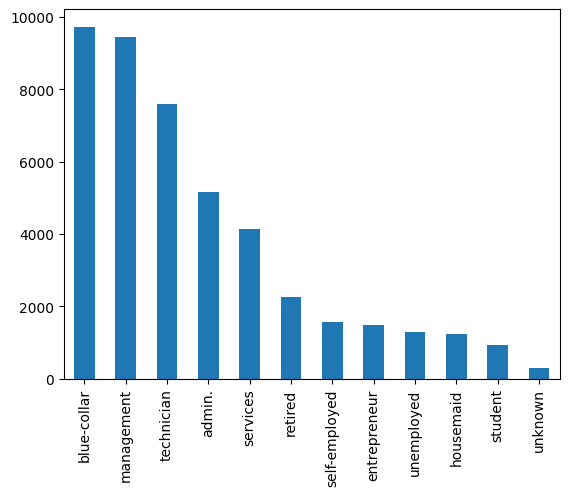

In [ ]:
#Most common class for Job variable is blue-collar
df['Job'].value_counts().plot(kind='bar')

<Axes: >

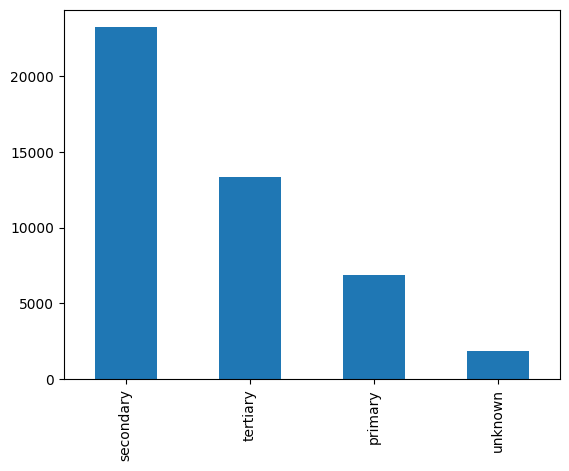

In [ ]:
#Most common class for Education variable is secondary
df['Education'].value_counts().plot(kind='bar')

In [ ]:
#Imputing Job and Education variables with the most common class (blue-collar & secondary)
df.loc[ df["Job"] == "unknown", "Job"] = "blue-collar"
df.loc[ df["Education"] == "unknown", "Education"] = "secondary"

In [ ]:
#Deleting Last Outcome variable due to its unknown classes being the most dominant (82%)
del df['Poutcome']

In [ ]:
#Calculate correlation for numerical (contiuous) variables - Variables selection
#Some values in the Pdays variable are indicated with "-1" meaning that this person has not been contacted in the last campaign.
#This shows a false correlation between variables as seen below: 45% correlation between Pdays and Previous variable
cor10 = df.corr()
#Heatmap
heatmap10 = cor10.style.background_gradient(cmap='RdBu_r')
heatmap10

<ipython-input-14-69d7400ee6ae>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor10 = df.corr()


,Age,Balance,Lst_Contact_Day,Lst_Contact_Duration,Campaign,Pdays,Previous,Outcome
Age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
Balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
Lst_Contact_Day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
Lst_Contact_Duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
Campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
Pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
Previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
Outcome,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [ ]:
#Given that, the below code creates a new subset that excludes these observations
#This is because we cannot measure association between Pdays and other variables while considering -1 which is not a valid value for Pdays
df_subset1 = df[df["Pdays"] != -1]
cor1 = df_subset1.corr()
#Heatmap
heatmap = cor1.style.background_gradient(cmap='RdBu_r')
heatmap

<ipython-input-15-d25ba6b1cd5c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor1 = df_subset1.corr()


,Age,Balance,Lst_Contact_Day,Lst_Contact_Duration,Campaign,Pdays,Previous,Outcome
Age,1.000000,0.115480,0.018399,0.060519,0.003842,-0.107863,0.002280,0.072577
Balance,0.115480,1.000000,0.051732,0.040998,-0.008150,-0.108122,0.001570,0.076995
Lst_Contact_Day,0.018399,0.051732,1.000000,-0.012687,-0.029295,-0.090095,-0.016801,0.029952
Lst_Contact_Duration,0.060519,0.040998,-0.012687,1.000000,-0.088394,-0.024407,-0.002150,0.342610
Campaign,0.003842,-0.008150,-0.029295,-0.088394,1.000000,0.050534,0.135523,-0.094110
Pdays,-0.107863,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885,-0.152206
Previous,0.002280,0.001570,-0.016801,-0.002150,0.135523,-0.021885,1.000000,0.008622
Outcome,0.072577,0.076995,0.029952,0.342610,-0.094110,-0.152206,0.008622,1.000000


In [ ]:
print("Since the only high correlations are between the independent continuous variables and the dependent variable,")
print(" we have 2 options before going to categorical variables:")
print("")
print("1) Consider all of the above continuous variables practically important and keep them all and use regularization techniques")
print("   to decrease number of variables")
print("2) Delete some variables from now")

Since the only high correlations are between the independent continuous variables and the dependent variable,
 we have 2 options before going to categorical variables:

1) Consider all of the above continuous variables practically important and keep them all and use regularization techniques
   to decrease number of variables
2) Delete some variables from now


In [ ]:
print("**The choice between PCA and Regularization techniques**")
print("")
print("- Regularization techniques are best used when dealing with a mix of coninuous and categorical variables")
print("- They are also a better pick when it comes to interpretibility")
print("- However, these techniques will reduce the weight of some unimportant variables, compared to PCA which will preserve all variables")
print("  to have the same weight, capturing all information")
print("")
print("With that being said, Regularization techniques seem to be a better choice for Dimensionality Reduction (Reducing number of variables")

**The choice between PCA and Regularization techniques**

- Regularization techniques are best used when dealing with a mix of coninuous and categorical variables
- They are also a better pick when it comes to interpretibility
- However, these techniques will reduce the weight of some unimportant variables, compared to PCA which will preserve all variables
  to have the same weight, capturing all information

With that being said, Regularization techniques seem to be a better choice for Dimensionality Reduction (Reducing number of variables


In [ ]:
#Code to delete Last contact month from model
del df_subset1['Lst_Contact_Month']

In [ ]:
#After deciding on the above variable, we will calculate VIF
#VIF will tell us about multicollinearity among variables, however, it is a good practice to calculate VIF after removing any highly correlated continuous variables
continuous_vars = ['Balance', 'Lst_Contact_Day', 'Lst_Contact_Duration','Campaign','Pdays','Previous','Outcome']
categorical_vars = ['Job', 'MS', 'Education','Credit','House_Loan','Personal_Loan','Contact']
dummy_vars = pd.get_dummies(df_subset1[categorical_vars], drop_first=True)
X = pd.concat([df_subset1[continuous_vars], dummy_vars], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor              features
0     1.310474               Balance
1     3.975375       Lst_Contact_Day
2     2.561141  Lst_Contact_Duration
3     2.787685              Campaign
4     5.305872                 Pdays
5     1.512938              Previous
6     9.649637               Outcome
7     2.449291       Job_blue-collar
8     1.209644      Job_entrepreneur
9     1.117404         Job_housemaid
10    3.379414        Job_management
11    1.478233           Job_retired
12    1.284133     Job_self-employed
13    1.569296          Job_services
14    1.320584           Job_student
15    2.102755        Job_technician
16    1.175333        Job_unemployed
17    5.346225            MS_married
18    3.556017             MS_single
19    5.102469   Education_secondary
20    4.840511    Education_tertiary
21    1.015662            Credit_yes
22    3.360819        House_Loan_yes
23    1.196880     Personal_Loan_yes
24    1.137016     Contact_telephone
25    1.054018       Contact_unknown


In [ ]:
print("Based on the above analysis in multicollinearity, we decided to remove age from the model due to the following reasons:")
print("1) Age does not imply investment power for people since some people can be wealthy in younger ages")


Based on the above analysis in multicollinearity, we decided to remove age from the model due to the following reasons:
1) Age does not imply investment power for people since some people can be wealthy in younger ages


In [ ]:
#Convert Previous variable from string to float
df_subset1['Previous'] = df_subset1['Previous'].astype(float)

<ipython-input-21-4310f0bd4cf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset1['Previous'] = df_subset1['Previous'].astype(float)


In [ ]:
#Dimensionlity Reduction using Elastic Net
#import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_subset1.drop('Outcome', axis=1), df_subset1['Outcome'], test_size=0.3, random_state=42)


# Define the transformer for the categorical columns
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), categorical_vars)],
    remainder='passthrough'
)

# Fit the transformer to the training data and transform it
X_train_transformed = ct.fit_transform(X_train)

# Create Elastic net regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)

# Fit the model to the transformed training data
model.fit(X_train_transformed, y_train)

# Transform the test data using the same transformer
X_test_transformed = ct.transform(X_test)

# Predict the outcome variable for the transformed test data
y_pred = model.predict(X_test_transformed)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

#Since R-square value is low, this suggest that the model is underfitting and that all variables are important to an extent.
#The fact that RMSE as low as well is explained by the fact that predictions are closer to the mean, getting lower error devitations,
# regradless of the accuracy.


RMSE: 0.39320038556180364
R-squared: 0.1334423150599412


In [ ]:
#Another trial for Elastic Net by tuning the hyperparameters
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the transformer for the categorical columns
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), categorical_vars)],
    remainder='passthrough'
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_subset1.drop('Outcome', axis=1), df_subset1['Outcome'], test_size=0.3, random_state=42)

# Fit the transformer on the training data
ct.fit(X_train)

# Transform the training data using the fitted transformer
X_train_transformed = ct.transform(X_train)

# Define the parameter distribution for random search
param_dist = {
    'alpha': uniform(0, 1),
    'l1_ratio': uniform(0, 1)
}

# Create the Elastic Net model
model = ElasticNet()

# Perform randomized search
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=42
)
random_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# Fit the Elastic Net model with the best hyperparameters
best_model = ElasticNet(**random_search.best_params_)
best_model.fit(X_train_transformed, y_train)

# Transform the test data using the fitted transformer
X_test_transformed = ct.transform(X_test)

# Make predictions on the test set
y_pred = best_model.predict(X_test_transformed)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

print("Elastic Net is still performing poorly and this could be due to the unfulfilling assumption that Elastic Net assumes that the relationship between the")
print("the independent variables and the target variable is linear. This is supported by the fact that the independent variables have low correlation")
print("with the target variable in the correlation matrix. Alternatively, the model might be complex for Elastic Net")

#IMPORTANT: Accuracy cannot be measured here because it needs the target variable to be a class, Elastic Net, Lasso, and Ridge regression do convert the 1s and 0s
#into numerical values actually which explains why the model might perform poorly here...

Best hyperparameters: {'alpha': 0.02541912674409519, 'l1_ratio': 0.10789142699330445}
RMSE: 0.37165707570291784
R-squared: 0.22579776823343656
Elastic Net is still performing poorly and this could be due to the unfulfilling assumption that Elastic Net assumes that the relationship between the
the independent variables and the target variable is linear. This is supported by the fact that the independent variables have low correlation
with the target variable in the correlation matrix. Alternatively, the model might be complex for Elastic Net


In [ ]:
#Import necessary library and replace any punctuation values
import numpy as np
df_subset1 = df_subset1.replace(r'^\s*$', np.nan, regex=True)

#Code to delete Age from model
del df_subset1['Age']

In [ ]:
#Because of the above finding, we proceeded to classification supervised learning techinque which is SVM without deleting any more variables given that
#  it is considered one of the most robust classification techniques.

#Support Vector Machine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_subset1.drop('Outcome', axis=1), df_subset1['Outcome'], test_size=0.3, random_state=42)

# Define the transformer for the categorical columns
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), ['Job', 'MS', 'Education','Credit','House_Loan','Personal_Loan','Contact'])],
    remainder='passthrough'
)

# Fit the transformer to the training data and transform it
X_train_transformed = ct.fit_transform(X_train)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)

# Create SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# Transform the test data using the same transformer and scaler
X_test_transformed = ct.transform(X_test)
X_test_scaled = scaler.transform(X_test_transformed)

# Predict the outcome variable for the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
r_squared = model.score(X_test_scaled, y_test)
print('R-squared:', r_squared)

Accuracy: 0.7929782082324455
RMSE: 0.45499647445618135
R-squared: 0.7929782082324455


In [ ]:
#Here we are trying another supervised machine learning technique covered in the course, which is Naive Bayes
#Naive Bayes Method
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_subset1.drop('Outcome', axis=1), df_subset1['Outcome'], test_size=0.3, random_state=42)

# Preprocess data using one-hot encoding and an imputation transformer
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
imputer = SimpleImputer(strategy='mean')
X_train_ohe = ohe.fit_transform(X_train.select_dtypes(include=['object']))
X_test_ohe = ohe.transform(X_test.select_dtypes(include=['object']))
X_train_imputed = imputer.fit_transform(X_train.select_dtypes(exclude=['object']))
X_test_imputed = imputer.transform(X_test.select_dtypes(exclude=['object']))
feature_names = list(ohe.get_feature_names_out(X_train.select_dtypes(include=['object']).columns))
X_train_processed = pd.DataFrame(data=X_train_ohe, columns=feature_names, index=X_train.index)
X_train_processed[X_train.select_dtypes(exclude=['object']).columns] = X_train_imputed
X_test_processed = pd.DataFrame(data=X_test_ohe, columns=feature_names, index=X_test.index)
X_test_processed[X_test.select_dtypes(exclude=['object']).columns] = X_test_imputed

# Create decision tree model
model = DecisionTreeClassifier()

# Fit the model to the preprocessed training data
model.fit(X_train_processed, y_train)

# Predict the outcome variable for the preprocessed test data
y_pred = model.predict(X_test_processed)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
r_squared = model.score(X_test_scaled, y_test)
print('R-squared:', r_squared)

#However, we can see that SVM still outperforms Naive Bayes in R-square, accuracy, and RMSE measures, indicating that SVM is a better techinque given our dataset.

Accuracy: 0.7667473769168685
RMSE: 0.4829623412680657
R-squared: 0.28490718321226793


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Next in the final report, we will try making ensemble modeling for better results.

In [ ]:
#Based on the characteristics of our dataset, we will do a Gradient Boosting Ensemble Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Convert categorical variables
df_subset5 = pd.get_dummies(df_subset1, columns=['Job', 'MS', 'Education','Credit','House_Loan','Personal_Loan','Contact'])

# Define X and y
X = df_subset5.drop('Outcome', axis=1) # Drop the target variable column
y = df_subset5['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Gradient Boosting Classifier model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the Gradient Boosting Classifier model to the training data
gbc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gbc.predict(X_test)

# Evaluate the performance of the ensemble on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Test RMSE score:", rmse)
print("Test R2 score:", r2)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print("Here it appears again that the indpendent varaibles have non-linear relationship since we're using a strong ensemble model and while it predicted")
print("well of an accuracy = 83%, however, the variablility of the independent variables couldn't explain the remaining 35% in the target variable (R^2 = 65%")

Test RMSE score: 0.41169348479630913
Test R2 score: 0.05001314405888535
Accuracy: 0.8305084745762712
Here it appears again that the indpendent varaibles have non-linear relationship since we're using a strong ensemble model and while it predicted
well of an accuracy = 83%, however, the variablility of the independent variables couldn't explain the remaining 35% in the target variable (R^2 = 65%


In [ ]:
#Based on this, SVM and Gradient Boosting Ensemble Model are the best two candidates for model deployment
#The statistics are as follows:
from tabulate import tabulate

# Define the headers for the table
headers10 = ["Model", "Accuracy", "RMSE", "R-squared"]

# Define the data for the table
data10 = [
    ["Gradient Bossting", "83.29%", "40.87%", "65.27%"],
    ["SVM", "79.29%", "45.5%", "79.29%"],
    ["Naive Bayes", "76.47%", "48.5%", "28.53%"]
]

# Print the table using tabulate
print(tabulate(data10, headers=headers10, tablefmt="grid"))

print("SVM and Gradient Boosting Ensemble Model are the best two candidates for model deployment")
print("The choice between them is difficult, however, because higher R square values means better explainability from the data used to make predictions,")
print("we will choose SVM model to be deployed since it is more balanced between the three options here and while Gradient Boosting has a lower MSE,")
print("but, the difference is just around 5% between SMV and Gradient Boosting which is not a big deal in the context of market campaigns")

+-------------------+------------+--------+-------------+
| Model             | Accuracy   | RMSE   | R-squared   |
+===================+============+========+=============+
| Gradient Bossting | 83.29%     | 40.87% | 65.27%      |
+-------------------+------------+--------+-------------+
| SVM               | 79.29%     | 45.5%  | 79.29%      |
+-------------------+------------+--------+-------------+
| Naive Bayes       | 76.47%     | 48.5%  | 28.53%      |
+-------------------+------------+--------+-------------+
SVM and Gradient Boosting Ensemble Model are the best two candidates for model deployment
The choice between them is difficult, however, because higher R square values means better explainability from the data used to make predictions,
we will choose SVM model to be deployed since it is more balanced between the three options here and while Gradient Boosting has a lower MSE,
but, the difference is just around 5% between SMV and Gradient Boosting which is not a big deal in t

In [ ]:
#SVM Model Deployment

# Load the necessary libraries
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Separate the features and target
X = df_subset1.iloc[:, :-1]
y = df_subset1.iloc[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the preprocessing steps
categorical_features = ['Job', 'MS', 'Education', 'Credit', 'House_Loan', 'Personal_Loan', 'Contact']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_features = ['Balance','Lst_Contact_Day', 'Lst_Contact_Duration', 'Campaign', 'Pdays', 'Previous']
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features),
                                               ('num', numerical_transformer, numerical_features)])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='linear'))])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the new instance
new_instance = pd.DataFrame([['management', 'single', 'primary', 'no', 'no', 'yes', 'telephone', 20, 17, 1.5, 2, 20, 3]],
                            columns=['Job', 'MS', 'Education', 'Credit', 'House_Loan', 'Personal_Loan',
                                     'Contact', 'Balance', 'Lst_Contact_Day', 'Lst_Contact_Duration', 'Campaign', 'Pdays', 'Previous'])
prediction = pipeline.predict(new_instance)

print(prediction)

[1]
